# Support Vector Regression

In [1]:
# from google.colab import files
# up = files.upload()

## import dataset

In [2]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df = df[['A', 'T']]
df.head(3)

,A,T
0,2.0,196
1,2.4,221
2,1.5,136


## cleaning

In [3]:
# clean the data

## encoding

In [4]:
# encode the data

## define x , y

In [5]:
# x and y must be define as 2D

import numpy as np
x = np.array(df[['A']])
y = np.array(df[['T']])

## train test split

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [7]:
y_train[:5]

array([[258],
       [212],
       [317],
       [308],
       [301]])

In [8]:
### finding best random state 

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVR
# from sklearn.metrics import r2_score

# lst = []
# for i in range(1,10):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
#     sc_x = StandardScaler().fit(x_train)
#     sc_y = StandardScaler().fit(y_train)
#     x_train = sc_x.transform(x_train)
#     x_test = sc_x.transform(x_test)
#     y_train = sc_y.transform(y_train)
#     y_test = sc_y.transform(y_test)
#     y_train = np.ravel(y_train)
#     y_test = np.ravel(y_test)
#     svr = SVR()
#     svr.fit(x_train, y_train)
#     yhat_test = svr.predict(x_test)
#     r2 = r2_score(y_test, yhat_test)
#     lst.append(r2)
# print(f"r2_score: {round(max(lst), 2)}")
# rs = np.argmax(lst) + 1
# print(f"random_state: {rs}")

## feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler().fit(x_train)
sc_y = StandardScaler().fit(y_train)

In [10]:
x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [11]:
y_train[:5]

array([ 0.02336012, -0.70701586,  0.96014671,  0.81724706,  0.70610289])

## fit train data

In [12]:
# def param
# kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0
# epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1

In [13]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

SVR()

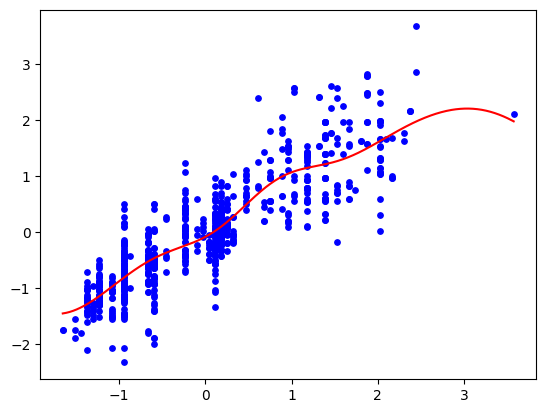

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, color='b', s=15)
xx = np.arange(np.min(x_train), np.max(x_train), 0.01).reshape(-1, 1)
plt.plot(xx, svr.predict(xx), color='r')
plt.show()

In [15]:
### K-fold cross validation

# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV

# parameters = {
#     '': [],
#     '': []
# }

# sv = SVR()
# gs = GridSearchCV(estimator=sv, param_grid=parameters, cv=5)

# gs.fit(x_train, y_train)

# best_params = gs.best_params_
# print(best_params)

## predict test data

In [16]:
yhat_test = svr.predict(x_test)

In [17]:
yhat_test[:5]

array([ 1.04715456,  0.02256772,  0.10044186, -0.24290104, -0.81385553])

## evaluating the model

In [18]:
from sklearn.metrics import r2_score
print(f"r2_score: {r2_score(y_test, yhat_test)}")

r2_score: 0.7757068866004216


## predict new data

In [19]:
sc_y.inverse_transform(svr.predict(sc_x.transform([[5.5]])).reshape(-1, 1))

array([[336.4709594]])

## save the model

In [20]:
# import joblib
# joblib.dump(svr, 'svr_model.pkl')

## load the model

In [21]:
# import joblib
# svr = joblib.load('svr_model.pkl')